In [1]:
using Pkg, Revise
Pkg.activate("../../elementary-linear-algebra/GenLinAlgProblems/")
using GenLinAlgProblems, AbstractAlgebra, LinearAlgebra, RowEchelon, Latexify, LaTeXStrings, SymPy, Random, AngleBetweenVectors

using PyCall
itikz = pyimport("itikz")
nM    = pyimport("itikz.nicematrix")

TMP="tmp";

<div style="float:center;width:100%;text-align:center;">
<strong style="height:100px;color:darkred;font-size:40px;">Jordan Form</strong></div>

**References:**
* [Grant B. Gustafson, Jordan Form and Eigenanalysis](https://www.math.utah.edu/~gustafso/s2018/2280/chapter11-systems/Ch11-6-Jordan-Form-and-Eigenanalysis.pdf)
* [Yuly Billig, Computation of the Jordan Form (Example 1)](https://youtu.be/lzjG6bgcLAk?t=2616) <br>
[Yuly Billig, Computation of the Jordan Form (Example 2)](https://youtu.be/lzjG6bgcLAk?t=3332)

**Remark:** The **Jordan Form** of a matrix is of great theoretical interest, but is **not useful for numerical computations.**

# 1. Jordan Form of a Matrix

## 1.1 Definitions and Theorem

Degenerate matrices may still be factored into $A = S J S^{-1}$<br> provided we relax the requirement that the matrix $J$ is diagonal.

<div style="background-color:#F2F5A9;color:black;">

**Definition:** A **Jordan block** $B_n(\lambda)$ of size $n \times n$ for a given eigenvalue $\lambda$ has the form<br><br>
    $\qquad B_n(\lambda) = \begin{pmatrix}
    \color{red}\lambda & \color{red}1           & 0        & 0      & \dots & 0 & 0 \\
    0       & \color{red}\lambda     & \color{red}1        & 0      & \dots & 0 & 0 \\
    0       & 0           & \color{red}\lambda  & \color{red}1      & \dots & 0 & 0 \\
    \dots   & \dots       & \dots    & \dots  & \dots & \dots & \dots \\
    0       &  0          & 0        &  \dots & 0     & \color{red}\lambda & \color{red}1 \\
    0       &  0          & 0        &  \dots & 0     & 0   & \color{red}\lambda \\
    \end{pmatrix}$,<br>
i.e., all diagonal entries are equal to a value $\lambda$ (possibly zero), and the superdiagonal entries are equal to 1.
</div>

**Examples:** $B_1(\lambda) = \begin{pmatrix} \color{red}\lambda \end{pmatrix},\quad$
$B_2(\lambda) = \begin{pmatrix} \color{red}\lambda & \color{red}1 \\ 0 & \color{red}\lambda \end{pmatrix},\quad$
$B_3(\lambda) = \begin{pmatrix} \color{red}\lambda & \color{red}1 & 0 \\ 0 & \color{red}\lambda & \color{red}1 \\ 0 & 0 & \color{red}\lambda\end{pmatrix},\quad\dots$

<div style="background-color:#F2F5A9;color:black;">

**Definition:** Given a matrix $A$ of size $n \times n$, a **Jordan form** $J$ for $A$<br>
$\qquad$ is a block diagonal matrix $J = diag(B_{m_1}(\lambda_1), B_{m_2}(\lambda_2), \dots , B_{m_k}(\lambda_k))$,<br>
$\qquad$ where the $\lambda_1, \dots \lambda_k$ are eigenvalues of $A$ and $m_1 + \dots + m_k = n.$

**Theorem:** every square matrix $A$ can be decomposed into $A = S J S^{-1}$, where $J$ is a Jordan form.
</div>

**Remarks:**
* since $J$ is an upper triangular matrix, its eigenvalues are the diagonal entries $\lambda_i$.
* if any $m_i > 1$ (i.e., if there are any entries 1 on the superdiagonal), the matrix $A$ is degenerate for eigenvalue $\lambda_i$.
* The matrix has exactly one eigenvector for each block $B_{m_i}(\lambda_i)$.

## 1.2 Example

As an example, consider
    $J = \left( \begin{array}{cc|c|c|c}
        \color{red}2 & \color{red}1 & 0 & 0 & 0 \\
        0 & \color{red}2 & 0 & 0 & 0 \\ \hline
        0 & 0 & \color{red}2 & 0 & 0 \\ \hline
        0 & 0 & 0 & \color{red}3 & 0 \\ \hline
        0 & 0 & 0 & 0 & \color{red}3 \\
        \end{array}\right),\quad$ which consists of four blocks: $B_2(2), B_1(2), B_1(3), B-1(3)$<br><br>
Thus, the **eigenvalues in different blocks are not necessarily distinct.**<br> **Blocks with the same eigenvalue can have different sizes.**

By convention, we will arrange blocks for the same eigenvalue by block size from largest to smallest.

____
This matrix is degenerate:
* eigenvalue $2$ has algebraic multiplicity 3 and geometric multiplicity 2 (two blocks with eigenvalue 2)
* eigenvalue $3$ has algebraic multiplicity 2 and geometric multiplicity 2 (two blocks with eigenvalue 3)

In [2]:
A=[2 1 0 0 0; 0 2 0 0 0; 0 0 2 0 0; 0 0 0 3 0; 0 0 0 0 3]
d,intA  = factor_out_denominator(A)

if d == 1
    display(l_show( L"\qquad A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" ))
else
    display(l_show(L"\qquad A = ", 1//d, intA, L"\quad p(\lambda) = %$(charpoly(A))" ))
end

L"$\qquad A = $$\begin{equation}
\left(
\begin{array}{rrrrr}
2 & 1 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 & 0 \\
0 & 0 & 2 & 0 & 0 \\
0 & 0 & 0 & 3 & 0 \\
0 & 0 & 0 & 0 & 3 \\
\end{array}
\right)
\end{equation}
$$\quad p(\lambda) = -λ^5 + 12*λ^4 - 57*λ^3 + 134*λ^2 - 156*λ + 72$"

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:blue;font-size:15pt;\">The matrix A is degenerate</p>\n</div>")

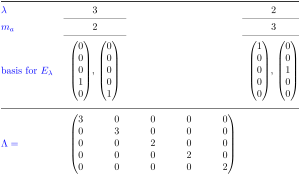

In [3]:
pr("The matrix A is degenerate", color= "blue", sz=15)
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1, mmLambda=11, color="blue", tmp_dir=TMP )

# 2. Naive Computation of a Jordan Form

## 2.1 Jordan Chains

Consider a matrix $A = S J S^{-1}$, where $J$ consists of a single Jordan block $B_n(\lambda)$,<br>
and let $S = \begin{pmatrix} v_1 & v_2 & \dots & v_n \end{pmatrix}$.

Expanding $A S = S J$, we see a set of equations known as a **Jordan Chain**<br>
$\qquad \left. \begin{align}
A v_1 &= \lambda v_1 \\
A v_2 &= \lambda v_2 + v_1 \\
\dots & \\
A v_n & = \lambda v_n + v_{n-1}
\end{align} \quad \right\}
\Leftrightarrow \left\{\;
\begin{aligned}
B v_1 &= 0 \\
B v_2 &= v_1 \\
\dots & \\
B v_n &= v_{n-1}
\end{aligned}
\right.
$<br><br>
$\qquad$ where we have set $B = A - \lambda I$.

**Remarks:**
* $v_1$ is an **eigenvector** of $A$
* each successive **generalized eigenvector** $v_i$ can be computed from the previous generalized eigenvector $v_{i-1}$<br>
$\qquad$ by solving $(A-\lambda I) v_i = v_{i-1}$.<br>
$\qquad$ The chain uses the same matrix $A-\lambda I)$ with successive right hand sides.
* The vectors $v_2, \dots v_n$ are **not** eigenvectors of $A$.
* For the general case, we have a Jordan chain for every block.

> **Naive Algorithm:** Given a square matrix $A$
> * compute an eigendecomposition
> * for each eigenvalue with less than the required number of vectors, compute a Jordan chain for each of the eigenvectors<br>
(this yields a Jordan block for each chain, together with the corresponding generalized eigenvectors)
> * assemble the Jordan form, being careful to maintain a consistent ordering of the generalized eigenvectors and the corresponding Jordan blocks.

This usually works, although we may have to carefully choose the eigenvectors used to compute the chains.

## 2.2 Naive Computation Example

In [4]:
μ = 5
A = [-3 1 0 1 1; -3 1 0 1 1; -4 1 0 2 1; -3 1 0 1 1; -4 1 0 1 2]+μ*I
B = A-μ*I
d,intA  = factor_out_denominator(A)
pr("Consider the following matrix A", color="blue", sz=1)
if d == 1
    display(l_show( L"\qquad A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" ))
else
    display(l_show(L"\qquad A = ", 1//d, intA, L"\quad p(\lambda) = %$(charpoly(A))" ))
end

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:blue;font-size:1pt;\">Consider the following matrix A</p>\n</div>")

L"$\qquad A = $$\begin{equation}
\left(
\begin{array}{rrrrr}
2 & 1 & 0 & 1 & 1 \\
-3 & 6 & 0 & 1 & 1 \\
-4 & 1 & 5 & 2 & 1 \\
-3 & 1 & 0 & 6 & 1 \\
-4 & 1 & 0 & 1 & 7 \\
\end{array}
\right)
\end{equation}
$$\quad p(\lambda) = -λ^5 + 26*λ^4 - 270*λ^3 + 1400*λ^2 - 3625*λ + 3750$"

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:blue;font-size:15pt;\">The matrix is degenerate: we need two more vectors for eigenvalue 5</p>\n</div>")

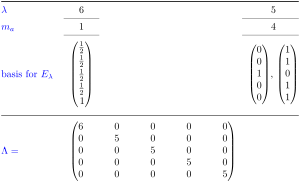

In [5]:
pr("The matrix is degenerate: we need two more vectors for eigenvalue $(μ)", color="blue", sz=15)
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1, mmLambda=11, color="blue", tmp_dir=TMP )

#### Step: The chain for $v = \begin{pmatrix} 0\\0\\1\\0\\0\end{pmatrix}$

In [6]:
v₁₁=[0;0;1;0;0]
pb = ShowGe{Rational{Int}}( B, v₁₁, tmp_dir=TMP, keep_file=TMP*"/jordan_ex_1_1a")
ref!(pb)
ex_1_1a = show_layout!(pb);
v₁₂, Xh = solutions(pb);

In [ ]:
pb.B = [ pb.B v₁₂]; pb.num_rhs=2; pb.keep_file=TMP*"/jordan_ex_1_1b"
ref!(pb)
ex_1_1b= show_layout!(pb);
pr( "Each solution in a Jordan Chain becomes a new right hand side for the next step", color="blue", sz=10)

<div style=float:left;><img src="tmp/jordan_ex_1_1a.svg" width=320></div>
<div style=float:left;padding-left:2cm;><img src="tmp/jordan_ex_1_1b.svg" width=345></div>

We started with the first eigenvector and computed the chain.
* Note that the chain length is 2: trying for an additional generalized eigenvector results in an inconsistent system.
* Also note that the GE computation does not change: we just keep appending generalized eigenvectors to the right and carry out the matrix multiplications.

In [8]:
pr("The generalized eigenvector is")
l_show( L"\qquad v_{1 2} =", v₁₂ )

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">The generalized eigenvector is</p>\n</div>")

L"$\qquad v_{1 2} =$$\begin{equation}
\left(
\begin{array}{r}
0 \\
-1 \\
0 \\
1 \\
0 \\
\end{array}
\right)
\end{equation}
$"

In [9]:
B₁=[μ 1; 0 μ]
S₁=[v₁₁ v₁₂]
pr( "The chain with v₁₁ contributes")
l_show(L"\qquad S_1 =", S₁, L", \quad B_1 =", B₁)

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">The chain with v₁₁ contributes</p>\n</div>")

L"$\qquad S_1 =$$\begin{equation}
\left(
\begin{array}{rr}
0 & 0 \\
0 & -1 \\
1 & 0 \\
0 & 1 \\
0 & 0 \\
\end{array}
\right)
\end{equation}
$$, \quad B_1 =$$\begin{equation}
\left(
\begin{array}{rr}
5 & 1 \\
0 & 5 \\
\end{array}
\right)
\end{equation}
$"

#### Step: The chain for $v = \begin{pmatrix} 1\\1\\0\\1\\1\end{pmatrix}$

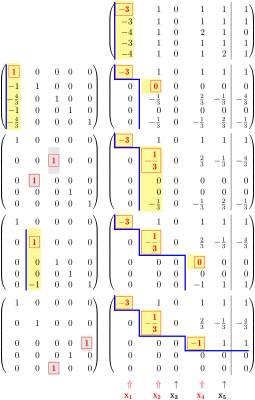

In [10]:
v₂₁=[1;1;0;1;1]
pb = ShowGe{Rational{Int}}( B,  v₂₁, tmp_dir=TMP)
ref!(pb)
show_layout!(pb)

In [11]:
v₂₂, Xh = solutions(pb)
l_show( L"\qquad v_{2 2} =", v₂₂)

L"$\qquad v_{2 2} =$$\begin{equation}
\left(
\begin{array}{r}
0 \\
2 \\
0 \\
-1 \\
0 \\
\end{array}
\right)
\end{equation}
$"

**We now have the right number of vectors: we can stop here!**

In [12]:
B₂=[μ 1; 0 μ]
S₂=[v₂₁ v₂₂]
pr( "The chain with v₂₁ contributes")
l_show(L"\qquad S_2 =", S₂, L",\quad B_2 =", B₂)

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">The chain with v₂₁ contributes</p>\n</div>")

L"$\qquad S_2 =$$\begin{equation}
\left(
\begin{array}{rr}
1 & 0 \\
1 & 2 \\
0 & 0 \\
1 & -1 \\
1 & 0 \\
\end{array}
\right)
\end{equation}
$$,\quad B_2 =$$\begin{equation}
\left(
\begin{array}{rr}
5 & 1 \\
0 & 5 \\
\end{array}
\right)
\end{equation}
$"

#### A Jordan form for A

In [13]:
S₀ = [ 1;1;1;1;2]
S = [ S₀ S₁ S₂ ]
J = zero_matrix(Int,5,5); J[1,1]=μ+1; J[2:3,2:3]=B₁; J[4:5,4:5]=B₂
l_show( L"\qquad A = S J S^{-1}, \text{ where } S = ", S, L"\quad \text{ and } J =", J)

L"$\qquad A = S J S^{-1}, \text{ where } S = $$\begin{equation}
\left(
\begin{array}{rrrrr}
1 & 0 & 0 & 1 & 0 \\
1 & 0 & -1 & 1 & 2 \\
1 & 1 & 0 & 0 & 0 \\
1 & 0 & 1 & 1 & -1 \\
2 & 0 & 0 & 1 & 0 \\
\end{array}
\right)
\end{equation}
$$\quad \text{ and } J =$$\begin{equation}
\left(
\begin{array}{rrrrr}
6 & 0 & 0 & 0 & 0 \\
0 & 5 & 1 & 0 & 0 \\
0 & 0 & 5 & 0 & 0 \\
0 & 0 & 0 & 5 & 1 \\
0 & 0 & 0 & 0 & 5 \\
\end{array}
\right)
\end{equation}
$"

In [14]:
@show A*S == S*J;

A * S == S * J = true


# 3. Computation of a Jordan Form

## 3.1 Point Diagram and its Properties

### 3.1.1 The Diagram

<div style="float:left;width:50%;height:6cm;">
In order to develop a reliable algorithm,<br>
let's investigate the Jordan Chain Equations.<br><br>

$\qquad \left\{\;
\begin{aligned}
B\ v_1 &= 0 \\
B\ v_2 &= v_1 \\
\dots & \\
B\ v_n &= v_{n-1}
\end{aligned}
\right.$<br><br>$\qquad$ where $B = A - \lambda I$.
</div>
<div style="float:left;width:35%;height:6cm;padding-left:1cm;border-left: thin solid black">
We can represent this chain with a point diagram, where each point represents a vector in the chain:<br><br>
$\qquad \overset{v_1}{\bullet} \leftarrow \overset{v_2}{\bullet} \leftarrow \dots \leftarrow \overset{v_n}{\bullet}$ <br><br>
where the leftmost vector and rightmost vectors are $v_1$and $v_n$ respectively.<br>
It corresponds to a <strong>Jordan block $\mathbf{B_n(\lambda)}$.</strong>
</div>

____
<div style="float:left;width:50%;height:5.5cm;">

**Example: Point Diagram for a given eigenvalue:**<br> represent each of the chains with a point diagram,<br>
ordered by the length of the chain from longest to shortest
e.g.,<br><br>
$\qquad\begin{align}
& \overset{v_{1 1}}{\bullet} \leftarrow \overset{v_{1 2}}{\bullet} \leftarrow \overset{v_{1 3}}{\bullet}  \leftarrow \overset{v_{1 4}}{\bullet} \\
& \overset{v_{2 1}}{\bullet} \leftarrow \overset{v_{2 2}}{\bullet} \\
& \overset{v_{3 1}}{\bullet} \leftarrow \overset{v_{3 2}}{\bullet} \\
& \overset{v_{4 1}}{\bullet} \\
\end{align}$
</div>
<div style="float:left;width:40%;height:5.5cm;padding-left:1cm;border-left: thin solid black">

i.e., **one chain** of length 4, followed by **2 chains** of length 2 and **1 chain** of length 1.

The diagram represents the Fordan form matrix<br><br>
    $\qquad \left(\begin{array}{cccc}
    B_4(\lambda) & 0            & 0            & 0 \\
    0            & B_2(\lambda) & 0            & 0 \\
    0            & 0            & B_2(\lambda) & 0 \\
    0            & 0            & 0            & B_1(\lambda)
    \end{array}\right)$<br>
</div>

**Remarks**:
* The vectors are indexed by chain and level, i.e., $\mathbf{v_{i j}}$ **is the vector in chain $i$ at level $j$.**
* The vectors in chain $i$ are related by $\mathbf{\ B\ v_{i k} = v_{i k-1}}$.<br>
**We can compute all vectors in the chain once we know the rightmost vector.**
* The vectors at level 1 are eigenvectors of the matrix

### 3.1.2 Nested Null Spaces

Let's look at a Jordan Chain again:<br><br>

$\qquad \left.\;
\begin{aligned}
B\ v_1 &= 0 \\
B\ v_2 &= v_1 \\
B\ v_3 &= v_2 \\
\dots & \\
B\ v_n &= v_{n-1}
\end{aligned}\right\}\;\Rightarrow\;\left\{
\begin{aligned}\;
& B\; v_1 = 0 \\
& B^2\ v_2 = B\ v_1 = 0\\
& B^3\ v_3 = B^2\ v_2 = 0\\
& \dots  \\
& B^n\ v_n = B^{n-1}\ v_{n-1} = 0
\end{aligned} \right.$

We see that the generalized eigenvector $v_k$ at level $k$ is in $\mathscr{N}(B^k)$.

The Jordan chain vectors belong to a **nested set of null spaces:**<br>
$\qquad \mathscr{N}(B) \subseteq \mathscr{N}(B^2) \subseteq \dots  \subseteq \mathscr{N}(B^n)$

**Remark:** Since the dimension of the nullspace of a matrix $A$ of size $N \times N$ is bounded by $\mathscr{N}(A) \le N$,<br>
$\qquad$ **this nested set must stabilize.**

### 3.1.3 The Algorithm

The theorems that establish the existence of the Jordan form of a matrix<br>
$\qquad$ guarantee that the following algorithm yields a basis of generalized eigenvectors:

> **Algorithm:** For each distinct eigenvalue $\lambda$ of a matrix $A$ with algebraic multiplicity $m_a$,<br> form $B = A - \lambda I$ and proceed as follows:
> * obtain the point diagram for $A$ by computing the dimension of $\mathscr{N}(B^i), i=1, 2, \dots n$, where $n$ is the smallest integer such that $\text{dim }\mathscr{N}(B^n) = m_a$.
> * for each of the remaining highest level endpoints (say level $i$) in the point diagram in turn (at say chain $k$),<br>
obtain a vector $v_{k i} \in \mathscr{N}(B^i)$ that is not in $\mathscr{N}(B^{i-1})$ and that is linearly independent of all previously obtained vectors $v_{\kappa i}, \kappa=1, 2, \dots k-1$
> * compute the Jordan chain starting with $v_{k i}$<br>
The length of the chain corresponding to a given generalized eigenvector is equal to its level in a point diagram.

i.e., we compute the generalized eigenvectors in a point diagram one chain at a time, starting from the longest to the shortest chain.

## 3.2 Computation of a Jordan Form Example

In [15]:
A=[5 1 -2 -1 -1; -1 2 1 0 0; 3 1 0 -1 -1; -3 0 2 3 1; 6 1 -4 -2 0]
l_show(L"\qquad A =", A, L"\quad p(\lambda) = %$(charpoly(A))" )

L"$\qquad A =$$\begin{equation}
\left(
\begin{array}{rrrrr}
5 & 1 & -2 & -1 & -1 \\
-1 & 2 & 1 & 0 & 0 \\
3 & 1 & 0 & -1 & -1 \\
-3 & 0 & 2 & 3 & 1 \\
6 & 1 & -4 & -2 & 0 \\
\end{array}
\right)
\end{equation}
$$\quad p(\lambda) = -λ^5 + 10*λ^4 - 40*λ^3 + 80*λ^2 - 80*λ + 32$"

### 3.2.1  Step 1: Compute the Eigenvalues of A and their Algebraic Multiplicities

For this matrix $\;p(\lambda) = - (\lambda -2)^5$,<br>
$\qquad$ i.e., $A$ has **a single eigenvalue $\mathbf{\lambda=2}$ with algebraic multiplicity $\mathbf{m_a = 5}$.**

In [16]:
# check:
@syms λ
@show det(A-λ*I) == expand(-(λ-2)^5);

det(A - λ * I) == expand(-((λ - 2) ^ 5)) = true


### 3.2.2 Step 2: Compute the Row Echelon Forms $\mathbf{(A-\lambda I)^k}$

We next obtain the point diagram for $A-2I$ by computing the ranks of $\mathscr{N}\left( (A-2I)^k \right)$

In [17]:
N = size(A,1)
λ = 2
B = (A-λ*I)//1
rref_B₁ = RowEchelon.rref(B)
rref_B₂ = RowEchelon.rref(B^2)
rref_B₃ = RowEchelon.rref(B^3)
display( l_show(L"\qquad \text{rref}( B ) =", rref_B₁, L"\qquad\text{dim} \mathscr{N}(B)    = ", N-rank(rref_B₁)))
display( l_show(L"\qquad \text{rref}( B^2 ) =", rref_B₂, L"\quad\text{dim} \mathscr{N}(B^2) = ", N-rank(rref_B₂)))
display( l_show(L"\qquad \text{rref}( B^3 ) =", rref_B₃, L"\quad\text{dim} \mathscr{N}(B^3) = ", N-rank(rref_B₃), L" = m_a"))

L"$\qquad \text{rref}( B ) =$$\begin{equation}
\left(
\begin{array}{rrrrr}
1 & 0 & 0 & -1 & -1 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & -1 & -1 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{array}
\right)
\end{equation}
$$\qquad\text{dim} \mathscr{N}(B)    = $$2$"

L"$\qquad \text{rref}( B^2 ) =$$\begin{equation}
\left(
\begin{array}{rrrrr}
1 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{array}
\right)
\end{equation}
$$\quad\text{dim} \mathscr{N}(B^2) = $$4$"

L"$\qquad \text{rref}( B^3 ) =$$\begin{equation}
\left(
\begin{array}{rrrrr}
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{array}
\right)
\end{equation}
$$\quad\text{dim} \mathscr{N}(B^3) = $$5$$ = m_a$"

Since the dimension of $\mathscr{N}(B^2) < 5,$ but $\mathscr{N}(B^3) = 5$ we **stop with $\mathbf{B^3}$.**
* The point diagram consists of $(\text{dim} \mathscr{N}(B) = 2$ chains, so level 1 has 2 points $v_{1 1}$ and $v_{2 1}$.
* Level 2 has $\text{dim} (\mathscr{N}(B^2) - \text{dim} (\mathscr{N}(B) = 2$ points $v_{1 2}$ and $v_{2 2}$.
* Level 3 has $\text{dim} (\mathscr{N}(B^3) - \text{dim} (\mathscr{N}(B^2) = 1$ point $v_{1 3}$.

$\qquad\begin{align}
& \overset{v_{1 1}}{\bullet} \leftarrow \overset{v_{1 2}}{\bullet} \leftarrow \overset{\color{red}{v_{1 3}}}{\bullet} \\
& \overset{v_{2 1}}{\bullet} \leftarrow \overset{\color{red}{v_{2 2}}}{\bullet} \\
\end{align}$

**Remarks:** the algorithm computes the rightmost vectors at each level together with the associated chain, i.e.,
* first compute $v_{1 3}$ and its chain
* next compute $v_{2 2}$ and its chain

At this point we know the Jordan form of $A = S J S^{-1}:$<br><br>
$\qquad J = \left(\begin{array}{ccc|cc}
        \color{red}2&\color{red}1&0 &0&0 \\ 0&\color{red}2&\color{red}1 &0&0 \\ 0&0&\color{red}2 &0&0 \\ \hline
        0&0&0  &\color{red}2&\color{red}1 \\ 0&0&0 &0&\color{red}2
        \end{array}\right),\quad$ together with $S = \begin{pmatrix} v_{1 1}&v_{1 2} & v_{1 3} & v_{2 1} & v_{2 2} \end{pmatrix}$.

### 3.2.3 Step 3: Compute the Nested Set of Basis Vectors

#### Basis Vector(s) at Level $\mathbf{n = 3}$ and their Chain

To obtain basis vectors for the highest level $n=3$, we need to select basis vectors in $\mathscr{N}(B^n)$
that are not in $\mathscr{N}(B^{n-1})$

In [18]:
pb2 = ShowGe{Rational{Int}}( rref_B₂,  tmp_dir=TMP, keep_file=TMP*"/jordan_ex_2_1a")
ref!(pb2)
v_tmp, basis₂ = solutions(pb2);
pb3 = ShowGe{Rational{Int}}( rref_B₃,  tmp_dir=TMP, keep_file=TMP*"/jordan_ex_2_1b")
ref!(pb3)
v_tmp, basis₃ = solutions(pb3);
l_show( L"\qquad\text{basis for }\mathscr{N}( B^2 ) = \text{cols}", basis₂,
        L"\qquad\text{basis for }\mathscr{N}( B^3 ) = \text{cols}", basis₃)

L"$\qquad\text{basis for }\mathscr{N}( B^2 ) = \text{cols}$$\begin{equation}
\left(
\begin{array}{rrrr}
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}
\right)
\end{equation}
$$\qquad\text{basis for }\mathscr{N}( B^3 ) = \text{cols}$$\begin{equation}
\left(
\begin{array}{rrrrr}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}
\right)
\end{equation}
$"

Identify one basis vector in $\mathscr{N}(B^3)$ not in $\mathscr{N}(B^2)$ (we only need a single vector $v_{1 3}$),
and compute its chain

In [19]:
display(l_show(L"\qquad\text{combine the bases and look for pivots: rref yields }", RowEchelon.rref([basis₂ basis₃] )))
print("we can choose either the first or the third basis vectors. Let's choose the first:")
v₁₃ = basis₃[:,1]
v₁₂ = B * v₁₃
v₁₁ = B * v₁₂
l_show(L"\qquad v_{1 1} = ", v₁₁, L",\quad v_{1 2} = ", v₁₂, L",\quad v_{1 3} = ", v₁₃)

L"$\qquad\text{combine the bases and look for pivots: rref yields }$$\begin{equation}
\left(
\begin{array}{rrrrrrrrr}
1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & 0 & -1 & 0 & 0 \\
\end{array}
\right)
\end{equation}
$"

we can choose either the first or the third basis vectors. Let's choose the first:

L"$\qquad v_{1 1} = $$\begin{equation}
\left(
\begin{array}{r}
-1 \\
0 \\
-1 \\
0 \\
-1 \\
\end{array}
\right)
\end{equation}
$$,\quad v_{1 2} = $$\begin{equation}
\left(
\begin{array}{r}
3 \\
-1 \\
3 \\
-3 \\
6 \\
\end{array}
\right)
\end{equation}
$$,\quad v_{1 3} = $$\begin{equation}
\left(
\begin{array}{r}
1 \\
0 \\
0 \\
0 \\
0 \\
\end{array}
\right)
\end{equation}
$"

In [20]:
# check v₁₁ is indeed an eigenvector:
@show A*v₁₁ == λ*v₁₁;

A * v₁₁ == λ * v₁₁ = true


#### Basis Vector(s) at Level $2$ and its(their) Chain

The next highest level vector in the point diagram is $v_{2 2} \in \mathscr{N}(B^2)$.

We need to identify a basis vector in $\mathscr{N}(B^2)$ that is not in $v_{1 2} \cup \mathscr{N}(B)$. We only need one vector since there is only one chain starting at level 2.

In [21]:
pb1 = ShowGe{Rational{Int}}( rref_B₁,  tmp_dir=TMP, keep_file=TMP*"/jordan_ex_2_1c")
ref!(pb1)
v_tmp, basis₁ = solutions(pb1)

pr( "Identify a column with a pivot from the last 4 vectors")
display(l_show( L"\qquad", RowEchelon.rref([basis₁ v₁₂ basis₂])))
pr( "we see that we can pick the 2nd, 3rd or 4th vector from the basis", sz=10)

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">Identify a column with a pivot from the last 4 vectors</p>\n</div>")

L"$\qquad$$\begin{equation}
\left(
\begin{array}{rrrrrrr}
1 & 0 & 0 & -3 & 0 & 1 & 0 \\
0 & 1 & 0 & 6 & 0 & 0 & 1 \\
0 & 0 & 1 & -1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & -1 & -1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{array}
\right)
\end{equation}
$"

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:10pt;\">we see that we can pick the 2nd, 3rd or 4th vector from the basis</p>\n</div>")

In [22]:
v₂₂ = basis₂[:,4]  # pick the 4th basis vector
v₂₁ = B * v₂₂
l_show( L"\qquad v_{2 1} = ", v₂₁, L", \quad v_{2 2} = ", v₂₂)

L"$\qquad v_{2 1} = $$\begin{equation}
\left(
\begin{array}{r}
-1 \\
0 \\
-1 \\
1 \\
-2 \\
\end{array}
\right)
\end{equation}
$$, \quad v_{2 2} = $$\begin{equation}
\left(
\begin{array}{r}
0 \\
0 \\
0 \\
0 \\
1 \\
\end{array}
\right)
\end{equation}
$"

In [23]:
# check v₂₁ is an eigenvector
@show A*v₂₁ == λ*v₂₁;

A * v₂₁ == λ * v₂₁ = true


### 3.2.4 Step 4: Assemble the matrices

In [24]:
S=[v₁₁ v₁₂ v₁₃ v₂₁ v₂₂]
J=[2 1 0 0 0; 0 2 1 0 0; 0 0 2 0 0; 0 0 0 2 1; 0 0 0 0 2]
print("A = S J S⁻¹, where")
l_show( L"\qquad S =", S, L",\quad J =", J)

A = S J S⁻¹, where

L"$\qquad S =$$\begin{equation}
\left(
\begin{array}{rrrrr}
-1 & 3 & 1 & -1 & 0 \\
0 & -1 & 0 & 0 & 0 \\
-1 & 3 & 0 & -1 & 0 \\
0 & -3 & 0 & 1 & 0 \\
-1 & 6 & 0 & -2 & 1 \\
\end{array}
\right)
\end{equation}
$$,\quad J =$$\begin{equation}
\left(
\begin{array}{rrrrr}
2 & 1 & 0 & 0 & 0 \\
0 & 2 & 1 & 0 & 0 \\
0 & 0 & 2 & 0 & 0 \\
0 & 0 & 0 & 2 & 1 \\
0 & 0 & 0 & 0 & 2 \\
\end{array}
\right)
\end{equation}
$"

In [25]:
# check
@show A*S == S*J;

A * S == S * J = true
